<a href="https://colab.research.google.com/github/carlos-ananias-delaguila/Master-AI-UAH/blob/main/Densely_connected_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2:  Densely Connected Networks


In [ ]:
'''
W1 assignment 

First of all, we start importing the Keras module and checking its version
''' 
import keras
keras.__version__

'2.6.0'

Preloading the data in Keras

In [ ]:
'''
W1 assignment

Then we import the dataset we are going to use to train our model. 
In this case, we will use the MNIST handwritten numbers' dataset.

After that, we load the dataset and populate both training and test sets 
using the following variables:
  * x_train - independant variables training set
  * y_train - dependant variable (labels) training set
  * x_test - independant variables testing set
  * y_test - dependant variable (labels) testing set

According to the official 
Keras documentation (https://keras.io/api/datasets/mnist/) 
the load_data function returns a tuple of NumPy arrays: 
(x_train, y_train), (x_test, y_test).

These variables have the following composition:
  * x_train: uint8 NumPy array of grayscale image data with 
           shapes (60000, 28, 28), containing the training data. 
           Pixel values range from 0 to 255
  * y_train: uint8 NumPy array of digit labels (integers in range 0-9) with 
           shape (60000,) for the training data.
  * x_test: uint8 NumPy array of grayscale image data 
            with shapes (10000, 28, 28), containing the test data. Pixel values 
            range from 0 to 255.
  * y_test: uint8 NumPy array of digit labels (integers in range 0-9) 
            with shape (10000,) for the test data.

'''
from keras.datasets import mnist

# obtenemos los datos para train y test 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
'''
W1 assignment

Print the number of array dimensions of the training data.
In our case it is 3 (Number of samples x Width x Height )
'''
print(x_train.ndim) 

3


In [ ]:
'''
W1 assignment

In order to check our training data shape, we print it using the shape attribute
of Numpy arrays.

That way we can check that our training data is composed of 60000 samples with
a resolution of 28 x 28 pixels.
'''
print(x_train.shape)

(60000, 28, 28)


In [ ]:
'''
W1 assignment

As mentioned, our training data type is unsigned int 8.
'''
print(x_train.dtype)

uint8


In [ ]:
'''
W1 assignment

We also check that our labels set has the correct size (60000 in our case).
'''
len (y_train)

60000

1


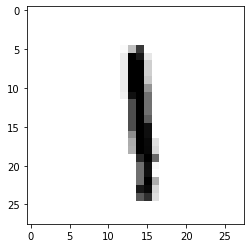

In [ ]:
'''
W1 assignment

Using the imshow function of the pyplot submodule of matplotlib
we display the training data contained in the 9th position, which corresponds
to the handwritten image of a number 1.

We also print the label assigned wich is, obviously, "1".
'''
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

In [ ]:
'''
W1 assignment

In this cell we import the Numpy library in order to print the sample image
we used earlier but in a 'numeric' format.

As seen, the sample is mostly composed of 0s except for the central part,
where the grayscale values of each pixel (0-255) is shown.
'''
import numpy
from numpy import linalg
numpy.set_printoptions(precision=2, suppress=True, linewidth=120)
print(numpy.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

4


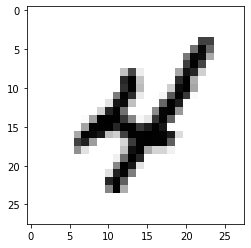

In [ ]:
'''
W1 assignment

Another example of image and label printing. In this case, it shows the image
of a number 4 and its corresponding label.
'''
plt.imshow(x_train[9], cmap=plt.cm.binary)
print(y_train[9])

3


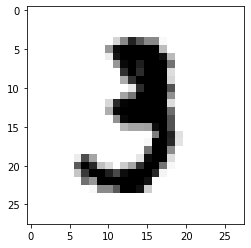

In [ ]:
'''
W1 assignment

Another example of image and label printing. In this case, it shows the image
of a number 3 and its corresponding label.
'''
plt.imshow(x_train[10], cmap=plt.cm.binary)
print(y_train[10])

6


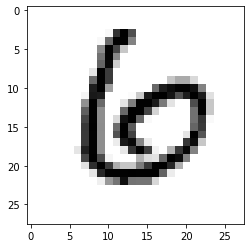

In [ ]:
'''
W1 assignment

Another example of image and label printing. In this case, it shows the image
of a number 6 and its corresponding label.
'''
plt.imshow(x_test[11], cmap=plt.cm.binary)
print(y_test[11])

In [ ]:
'''
W1 assignment

Ir order to converge faster, it is a best practice to normalize the data
contained in our training and testing samples.

Since we are going to normalize dividing each number by 255 so we have values
in the range (0, 1), it is first necessary to convert our sets to float.

After that we apply normalization dividing by 255, as mentioned.
'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [ ]:
'''
W1 assignment

Printing our numerical matrix again reveals the new type of values we
have in our samples.

In this case, as before, it depicts the number 1, but the grayscale values are
now normalized to the (0, 1) interval.
'''
print(numpy.matrix(x_train[8]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.25 0.77 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.08 1.   0.9  0.09 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]

In [ ]:
'''
W1 assignment

Since it is a densely connected network the input should be flattened
in order to feed the input layer.

Now, instead of having an array of (60000, 28, 28) we will end with an array
of (60000, 784), where 784 corresponds to the multiplication of both dimensions,
that is, 28x28. 
'''
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
'''
W1 assignment

Exploring our labels dataset we can check that they are represented by ordinal
numbers.

For categorical variables where no such ordinal relationship exists, the integer
encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering
between categories may result in poor performance or unexpected results 
(predictions halfway between categories).

That't why we will apply one-hot encoding to our labels datasets.

First, we print a couple of label samples to check their format.
'''
print(y_test[0])

7


In [ ]:
print(y_train[0])

5


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
'''
W1 assignment

Using the keras.utils function we apply one-hot encoding 
to our labels datasets.
'''
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
'''
W1 assignment

Now we can check with a couple of samples that our labels 
have been one-hot encoded.
'''
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_test.shape)

(10000, 10)


Model

In [ ]:
'''
W1 assignment

Now it's time to define our model.

After importing all the submodules we will need (sequential, Dense and sgd)
we define our model.

It consists of:
  * an input layer of 10 neurons. Each neuron receives 784 inputs corresponding
  to every sample and has a 'sigmoid' activation function at their output.
  * an output layer of 10 neurons. Since it is a classification problem using
  'softmax' as its activation function is convenient.

Finally, we print the summary of our model to have a better understanding of its
architecture.

The number of parameters of our model is composed of the following:
  * Input layer: 780 features * 10 neurons + 1 bias * 10 = 7850
  * Output layer: 10 outputs from input layer * 10 neurons + 1 bias * 10 = 110

This results in 7850 + 110 = 7960 parameters.
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________



Definition, training and evaluation


In [ ]:
'''
W1 assignment

Now that we've defined our model it's time to compile and fit it to our dataset.
We have also to define our hyperparameters such as:
  * batch size
  * number of epochs
  * loss function
  * optimizing function

In our case we compile our model with the following hyper-parameters:
  * loss function: categorical_crossentropy. This is the function used in Keras 
  for multiclassification problems.
  * optimizer: sgd. Stochastic Gradient Descent is the most common and 
  famous optimizer.
  * metrics: accuracy. We want to know how well our model performs in terms of 
  accuracy when classifying our samples, in contrast with regression problems,
  where we want to know the amount of error obtained.

After compiling, we proceed to fit our model by indicating both the features and
labels sets and also the number of epochs (10) and the batch size (50).

Once fitted, we evaluate our output model using the features and labels sets.

Finally, we obtain a test accuracy of 0.86 (86%), which is pretty good.
'''
batch_size = 50
num_classes = 10
epochs=10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 2.0711 - accuracy: 0.3818
Epoch 2/10
1200/1200 [==============================] - 2s 1ms/step - loss: 1.6549 - accuracy: 0.6016
Epoch 3/10
1200/1200 [==============================] - 2s 1ms/step - loss: 1.3465 - accuracy: 0.6809
Epoch 4/10
1200/1200 [==============================] - 2s 1ms/step - loss: 1.1261 - accuracy: 0.7319
Epoch 5/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.9697 - accuracy: 0.7689
Epoch 6/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.8568 - accuracy: 0.7970
Epoch 7/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.7723 - accuracy: 0.8183
Epoch 8/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.7063 - accuracy: 0.8351
Epoch 9/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6533 - accuracy: 0.8473
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.5749 

Predictions

In [ ]:
'''
W1 assignment

Now, using our testing set, we are going to predict the output labels for it.

We use the Keras' predict function for this purpose. As stated in the official
documentation of Tensorflow/Keras 
(https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict),
the 'predict' function returns a Numpy array(s) of predictions. 
'''
predictions = model.predict(x_test)

In [ ]:
'''
W1 assignment

Now we explore one of the predictions contained in our Numpy array. It will
gives us a set of 10 probabilities.

Adding all these values should all add up to one, which is our case.
'''
print(predictions[11])

[0.08 0.03 0.12 0.01 0.07 0.02 0.61 0.   0.03 0.02]


In [ ]:
numpy.sum(predictions[11])

1.0000001

In [ ]:
'''
W1 assignment

In order to check the label predicted we use the 'argmax' function, 
which returns the position of the predictions array with the highest value.

In this case, since the array indices corresponds to the labels we are trying
to predict, we can say that the label predicted corresponds to the number '6'.
'''
numpy.argmax(predictions[11])

6

In [ ]:
'''
W1 assignment

In this cell we define a function ('plot_confusion_matrix') that, using Pyplot
and Numpy, draws a confusion matrix that will help us to check how accurate
our model is when it comes to predict the correct value for our samples.
'''
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')



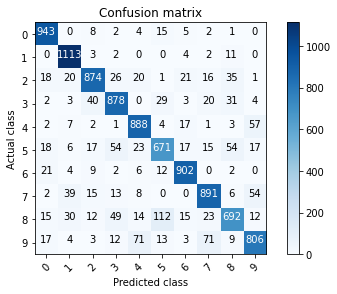

In [ ]:
'''
W1 assignment

Finally, in order to draw our confussion matrix, we prepare both the true labels
(y_test) and the predicted ones (Y_pred) to reverse the one-hot encoding process
so we can pass this as parameters for the 'sklearn.metrics.confusion_matrix' 
function.

According to the official 'Sci-kit learn' documentation
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
the 'confusion_matrix' function returns a ndarray 
of shape (n_classes, n_classes). This is the array we pass to our custom
function 'plot_confusion_matrix'.

As depicted in the resulting confusion matrix, the main diagonal contains high
values in proportion to the rest of the matrix. It is also noticiable by the
color depicted, which tends to be dark blue in such diagonal. This indicates
that our prediction is pretty good. 
'''

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = numpy.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = numpy.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))